<a href="https://colab.research.google.com/github/fahmoreira/imersao-alura/blob/main/Imers%C3%A3o_Dados_Aula_03_%7C_Correla%C3%A7%C3%B5es%2C_causalidade_e_rela%C3%A7%C3%B5es_entre_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imersão de Dados Alura

In [1]:
# Carregar os dados via URL
# No github abra o zip e em cima da opção "view raw" clique com o botão direito e copiar.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
# usar esse comando para não precisar dar plt.show em cada gráfico
import seaborn as sns
sns.set() # O Colab recebeu um update onde é necessário utilizar este comando p/ habilitar + funções

# Repositório dos dados
dados_url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(dados_url, compression = 'zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [2]:
# Padronização dos nomes das colunas

# Método 1
import re
list_columns = []
for column in dados.columns:
  list_columns.append(re.sub(r'[-]', '_', column))

dados = dados.set_axis(list_columns, axis='columns')
dados.head()

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_60,c_61,c_62,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
mapa = {'droga': 'composto'} #smallmolecur
dados.rename(columns=mapa, inplace=True) # Sem o parâmetro inplace da função rename a alteração será apenas uma máscara
# A função inplace é permanente, portanto é importante ATENÇÃO no uso

dados.head(3)

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_60,c_61,c_62,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931


# Parte 3 dos Estudos

Para criação de uma relação pode ser feito uma tabela de frequência e há vários métodos para a execução deste processo. 


> Afim de usar funções oferecidas pelo Pandas podemos buscar na documentação, por exemplo por "Frequency Table" o que nos retorná como resultado a função pd.crosstab.






In [4]:
# # Tabela de Frequência - Análise de dose x tempo
pd.crosstab(dados['dose'], dados['tempo'], margins=True)

tempo,24,48,72,All
dose,,,,
D1,3886,4354,3907,12147
D2,3886,3896,3885,11667
All,7772,8250,7792,23814


Ao executar o processo de relação entre doses e tempo assemelhou-se ao uso da função .value_counts, no entanto, de forma segmentada podemos, portanto, analisar a quantidade de doses aplicadas por cada período de tempo.



> Vale lembrar que a exposição acima ainda está misturado com aqueles que receberam COMPOSTO e aqueles que NÃO RECEBERAM.



In [5]:
# Tabela de Frequência - Análise de dose/tempo x tratamento

pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

* Por que há proporção do tratamento com drogas é tão grande em relação ao tratamento com controle?

* A tabela aparemente mostra-se balanceada, mas deve-se levar em consideração que ela foi CONSTRUÍDA COM OS VALORES ABSOLUTOS.



> Podemos colocar as proporções de cada um desses experimentos (dose x tempo) utilizando o método *normalize*



In [6]:
# Tabela de Frequência - Análise de dose/tempo x tratamento

pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize=True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

Ao utilizar o método 'normalize=True' ele normalizou o total da contagem igual 1 (100%) e calculou a proporção de cada uma das células.

* A idéia e verificar a proporção do index.
'normalize='index''.

In [7]:
# Tabela de Frequência - Análise de dose/tempo x tratamento

pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

* Agora configurado o normalize para index pode-se observar a homogeneidade visto que a soma das linhas é igual a 1 ou 100% de relação.

* Cada linha tem que dar 1 (100%)

In [8]:
# Tabela de Frequência - Análise de dose/tempo x tratamento

pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index', values=dados['g_0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -2.165955   3.165955
     48        -0.423801   1.423801
     72        32.731343 -31.731343
D2   24         0.085345   0.914655
     48         0.057868   0.942132
     72         0.217029   0.782971

* As medidas apresentadas são relevantes, se de fato possui significância estatística.

* A análise esta apontado somente para um ponto, ou seja, um resumo das mais de 23000 linhas.

In [9]:
dados[['g_0', 'g_3']].head()

,g_0,g_3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919


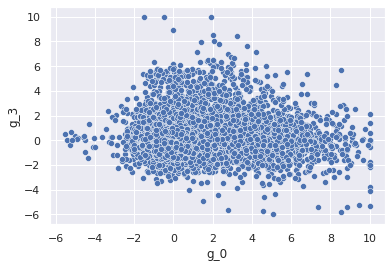

In [10]:
sns.scatterplot(x='g_0', y='g_3', data=dados)

O sccaterplot em resumo faz um plano cartesiano e o contexto apresentado acima é fazer a RELAÇÃO do 'g_0' (Gene) com o 'g_3', porém ainda não da para observar nenhum padrão...

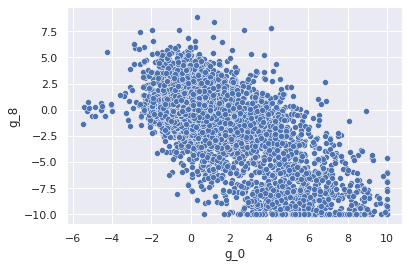

In [11]:
sns.scatterplot(x='g_0', y='g_8', data=dados)

O gráfico aparenta apresentar uma tendência, onde quanto maior 1 (g_0) menor o outro (g_8).

* Para ficar mais claro a tendência utiliza-se outro função do sns, chamada-se **.lmplot**


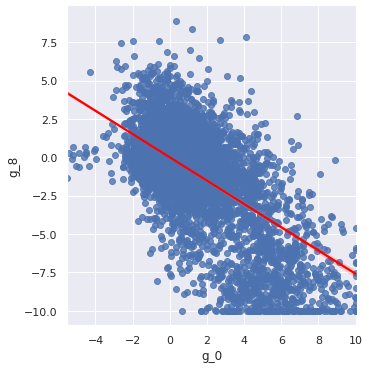

In [12]:
sns.lmplot(data=dados, x='g_0', y='g_8', line_kws={'color':'red'})

Neste momento é possível verificar a linha de tendência mais claramento, porém

### IMPORTANTE

A análise está sendo feito para todo o DataFrame, o que quer dizer que estão sendo apresentados todas as fetuares de tratamento (tempo, dose, composto e etc) no momento do processo de correlação dos genes. [O que pode causar uma ANÁLISE EQUÍVOCADA].

A análise deve ser mais concentrada e bem segmentada, por exemplo, olhar a relação desses 2 genes em função do tempo.

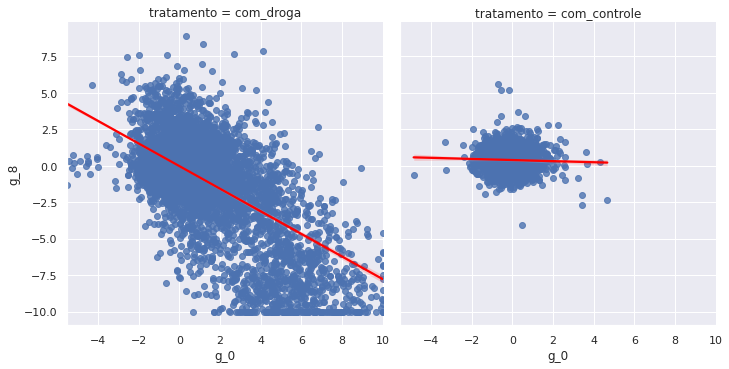

In [13]:
sns.lmplot(data=dados, x='g_0', y='g_8', line_kws={'color':'red'}, col='tratamento')

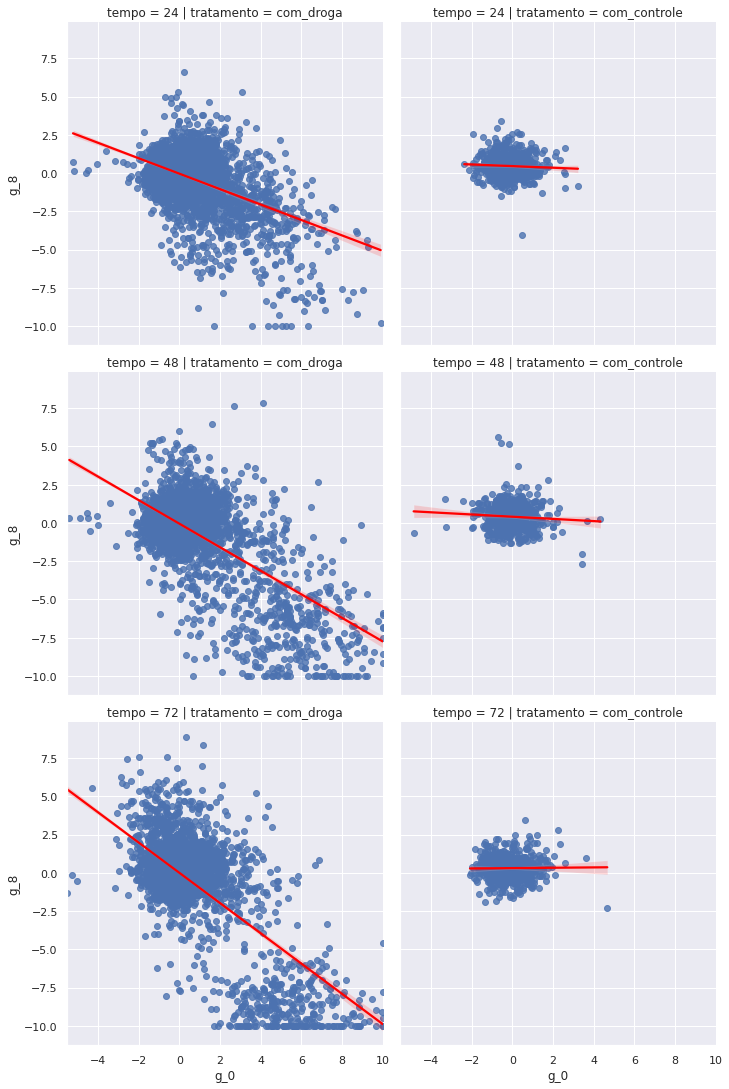

In [14]:
sns.lmplot(data=dados, x='g_0', y='g_8', line_kws={'color':'red'}, col='tratamento', row='tempo')

O que aparenta é que com mais tempo o efeito dos compostos é maior (a curva demonstra-se mais inclinada);

* O controle permanece estável.

> Está é uma das importâncias que se pode ter ao analisar a RELAÇÃO das variáveis.

### CORRELAÇÃO

In [15]:
dados.loc[:, 'g_0':'g_771'].corr()

,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,g_35,g_36,g_37,g_38,g_39,...,g_732,g_733,g_734,g_735,g_736,g_737,g_738,g_739,g_740,g_741,g_742,g_743,g_744,g_745,g_746,g_747,g_748,g_749,g_750,g_751,g_752,g_753,g_754,g_755,g_756,g_757,g_758,g_759,g_760,g_761,g_762,g_763,g_764,g_765,g_766,g_767,g_768,g_769,g_770,g_771
g_0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g_1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g_2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g_3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g_4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

Estas são todas as correlações das expressões gênicas.
* (**-1 e +1**): Quando se tem correlações muito próxima de **-1 e +1** significa que há variáveis altamente correlacionadas.
> Quer dizer que as variáveis são proporcionalmente correlacionados, ou seja,  quando um sobe o outro sobe também.

* (**0**): Quando se tem correlações muito próxima de **0** significa que as variáveis não são correlacionadas.
> Quer dizer que as variáveis são inversamente correlacionados, ou seja,  quando um sobe o outro desce.
** Neste caso significa que uma variável não afeta a outro.

Qual a correlação entre g_0 e g_8? É próxima de 1 ou -1?
* A correlação é negativa. No caso quando o g_0 sobe o g_8 desce. 
> Ao analisar utilizando o gráfico acima é possível fazer alguma identificações, porém este método não é o mais comum e para este caso pode-se pesquisar por: ***correlation matrix seaborn***

In [16]:
# Compute the correlation matrix
corr = dados.loc[:, 'g_0':'g_50'].corr()

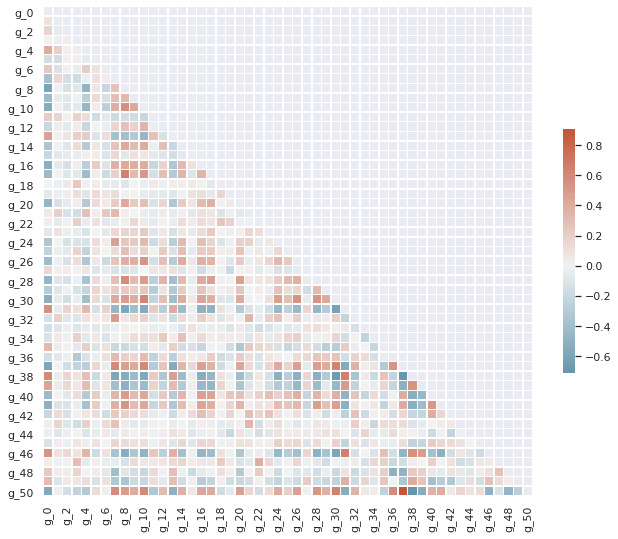

In [17]:
# Correlation Matrix
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

É possível observar que aparentemente há expressões gênicas mais correlacionadas uma com outras, porém na grande maioria a parte mais translucida a correlação é relativamente baixa.

> Não significa que um está causando aumento na expressão do outro, ou seja, NÃO IMPLICA CAUSALIDADE. 

No gráfico pode ser identificado que quando o 'g_0' está aumentando o 'g_8' está diminuindo, porém não necessariamente será o 'g_0' que fará o 'g_8' aumentar. (Não quer dizer que um está influenciando diretamente no outro)

> Pode ser que haja sim influência, porém olhar só esses valores não da para chegar a esta conclusão.

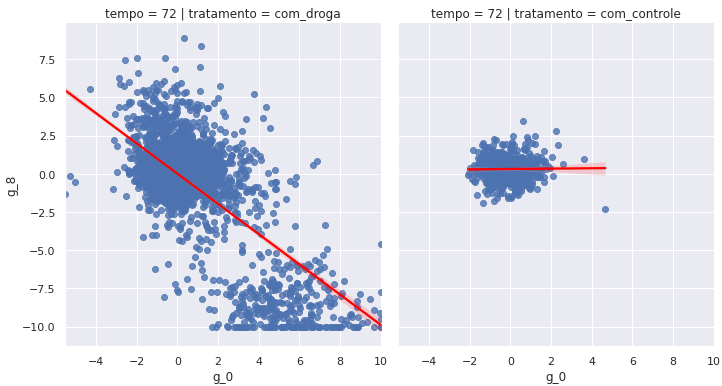

> ***Correlação*** não implica em ***causalidade***.

No site (https://www.tylervigen.com/spurious-correlations) pode ser encontrado alguns gráficos sobre correlações e suas supostas causalidades, por exemplo, no gráfico abaixo mostra uma boa correlação do consumo de margarina e a taxa de divórcio. 

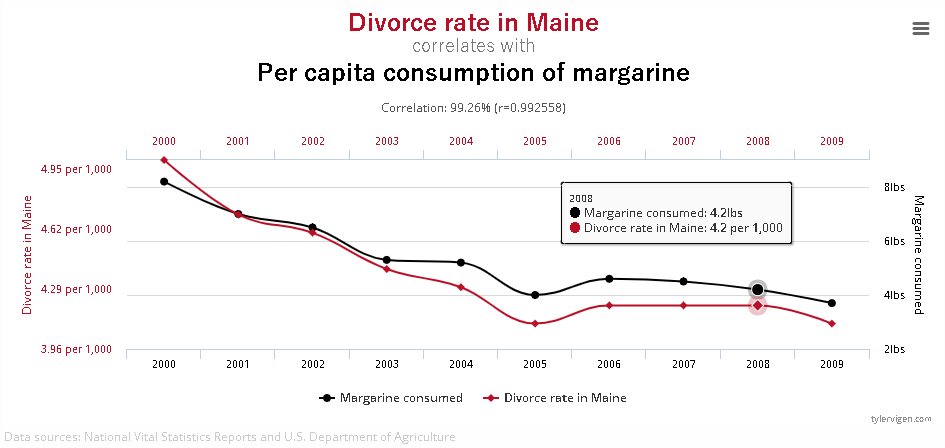

In [18]:
# Os 'c_' são os diferentes tipos celulares e a numeração se trata da viabilidade da célula, 
# o quanto as células sobrevivem ou não ao composto.

corr_celular = dados.loc[:, 'c_0':'c_50'].corr()

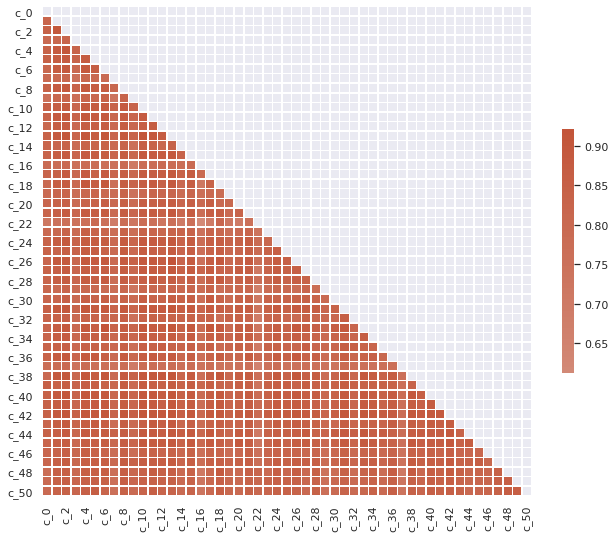

In [19]:
# Correlation Matrix
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

De alguma maneira os tipos celulares estão bem correlacionados.
* O tipo celular está influenciando na sobrevivência.

### P-Hacking
- https://pt.wikipedia.org/wiki/P-hacking
> P-hacking é um termo amplo usado em pesquisa científica para descrever vários tipos de manipulação comumente empregados na análise de dados que levam a resultados estatisticamente significativos mas equivocados ou enganosos.

Nesse momento de validações e pré-requisitos é importante pensar em publicações das pesquisas que também deram errados o qual pode ajudar na diminuição do esforço de outros pesquisadores.


---


### Sobre a alta correlação sobre os tipos celulares:
Aparentemente, tendo por referência o gráfico de correção mostrado, quando o conjunto celular é submetido a um determinado composto significa que os diversos tipos celulares reagem de maneira semelhante.
* Então se um composto está afetando a viabilidade celular (ex: matando mais um determinado tipo de célula) ele afeta os demais tipos celulares também.

# Desafios da Aula 3

### Desafio 01 (OK): Resolver o problema apresentado dentro da função .crosstab UTILIZANDO a função .groupby
- Criar tabelas de frequência com pandas.groupby

### Desafio 02 (OK): Normalizar o .crosstab pela coluna

### Desafio 03 (OK): Explorar mais possibilidades para a função aggfunc.

### Desafio 04 (OK): Explorar a função melt do pandas

### Desafio 05 (OK): Calcular e analisar a correlação entre os G e os C. Refletir sobre os efeitos biológicos.

### Desafio 06 (OK): Estudar o código que plota a matriz de correlação (heatmap)

### Desafio 07 (OK): Resumo do que foi aprendido com os dados





In [20]:
# Desafio 01
# Tabela de Frequência - Análise de dose/tempo x tratamento

dados.groupby(['dose','tempo'])['tratamento'].value_counts()

dose  tempo  tratamento  
D1    24     com_droga       3585
             com_controle     301
      48     com_droga       4011
             com_controle     343
      72     com_droga       3600
             com_controle     307
D2    24     com_droga       3581
             com_controle     305
      48     com_droga       3591
             com_controle     305
      72     com_droga       3580
             com_controle     305
Name: tratamento, dtype: int64

In [21]:
# Tabela de Frequência - Análise de dose/tempo x tratamento
dados.groupby(['dose','tempo'])['tratamento'].value_counts(normalize='index')

dose  tempo  tratamento  
D1    24     com_droga       0.922542
             com_controle    0.077458
      48     com_droga       0.921222
             com_controle    0.078778
      72     com_droga       0.921423
             com_controle    0.078577
D2    24     com_droga       0.921513
             com_controle    0.078487
      48     com_droga       0.921715
             com_controle    0.078285
      72     com_droga       0.921493
             com_controle    0.078507
Name: tratamento, dtype: float64

In [22]:
# Desafio 02
# https://pbpython.com/pandas-crosstab.html

pd.crosstab([dados.dose, dados.tempo], dados.tratamento, normalize='columns', values=dados['g_0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.437367   0.223043
     48         0.213286   0.249999
     72         0.512956   0.173497
D2   24        -0.018682   0.069855
     48        -0.022886   0.129997
     72        -0.122040   0.153610

In [23]:
# Desafio 03

pd.crosstab([dados.dose, dados.tempo], dados.tratamento, normalize='index', values=dados['g_0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.313783   0.686217
     48         0.376725   0.623275
     72         0.283925   0.716075
D2   24         0.289767   0.710233
     48         0.515489   0.484511
     72         0.257208   0.742792

In [24]:
pd.crosstab([dados.dose, dados.tempo], dados.tratamento, normalize='index', values=dados['g_0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.245622   0.754378
     48         0.255010   0.744990
     72         0.216434   0.783566
D2   24         0.266278   0.733722
     48         0.302407   0.697593
     72         0.318337   0.681663

In [25]:
pd.crosstab([dados.dose, dados.tempo], dados.tratamento, normalize='index', values=dados['g_0'], aggfunc='median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         1.102195  -0.102195
     48         1.081694  -0.081694
     72         1.077059  -0.077059
D2   24        -0.581818   1.581818
     48         0.630923   0.369077
     72         0.997167   0.002833

In [26]:
# https://medium.com/@yangdustin5/quick-guide-to-pandas-pivot-table-crosstab-40798b33e367
pd.crosstab([dados.dose, dados.tempo], dados.tratamento, normalize='index', values=dados['g_0'], aggfunc='count')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [27]:
# https://medium.com/@yangdustin5/quick-guide-to-pandas-pivot-table-crosstab-40798b33e367
pd.crosstab([dados.dose, dados.tempo], dados.tratamento, normalize='index', values=dados['g_0'], aggfunc='sum')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.060942   1.060942
     48        -0.026119   1.026119
     72        -0.096449   1.096449
D2   24         0.007885   0.992115
     48         0.005190   0.994810
     72         0.023070   0.976930

In [28]:
# Desafio 04

# https://stackoverflow.com/questions/51519101/simultaneously-melt-multiple-columns-in-python-pandas
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
pd.melt(dados, id_vars=['dose', 'tempo'], value_vars='tratamento')

,dose,tempo,variable,value
0,D1,24,tratamento,com_droga
1,D1,72,tratamento,com_droga
2,D1,48,tratamento,com_droga
3,D1,48,tratamento,com_droga
4,D2,72,tratamento,com_droga
...,...,...,...,...
23809,D2,24,tratamento,com_droga
23810,D2,24,tratamento,com_droga
23811,D2,48,tratamento,com_controle
23812,D1,24,tratamento,com_droga


In [29]:
  # Desafio 05

# Compute the correlation matrix
# https://datascienceparichay.com/article/pandas-filter-dataframe-for-multiple-conditions/#:~:text=Pandas%20provides%20operators%20%26%20(for%20and,it%20results%20in%20an%20error.

filtered_corr_t24 = dados[(dados['dose']=='D1')&(dados['tempo'] == 24)].loc[:,'g_0':'c_99'].corr()
corr_cel_genes24 = filtered_corr_t24.loc['g_0':'g_30', 'c_1':'c_30']

filtered_corr_t48 = dados[(dados['dose']=='D1')&(dados['tempo'] == 48)].loc[:,'g_0':'c_99'].corr()
corr_cel_genes48 = filtered_corr_t48.loc['g_0':'g_30', 'c_1':'c_30']

filtered_corr_t72 = dados[(dados['dose']=='D1')&(dados['tempo'] == 72)].loc[:,'g_0':'c_99'].corr()
corr_cel_genes72 = filtered_corr_t72.loc['g_0':'g_30', 'c_1':'c_30']

In [30]:
def pltgraph(dfplt):

  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(dfplt, dtype=bool))

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(dfplt, mask=mask, cmap=cmap, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

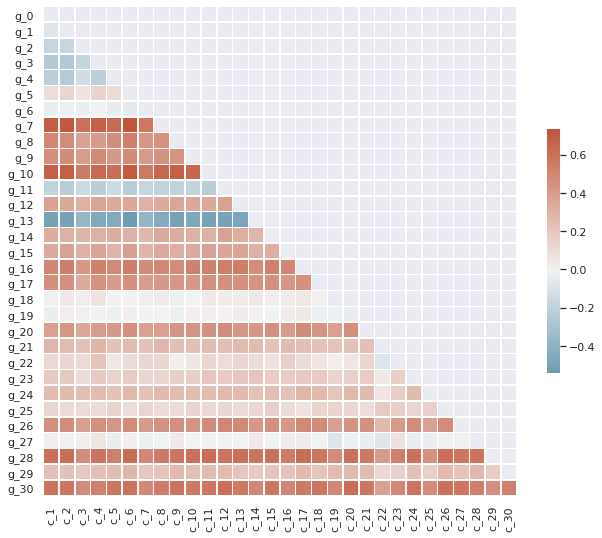

In [31]:
pltgraph(corr_cel_genes24)

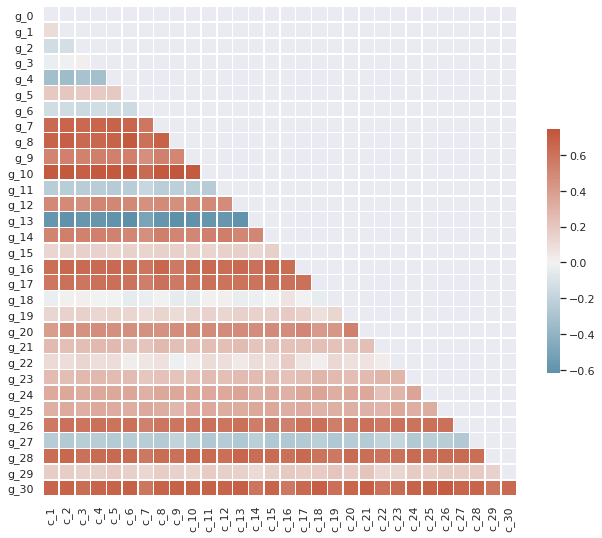

In [32]:
pltgraph(corr_cel_genes48)

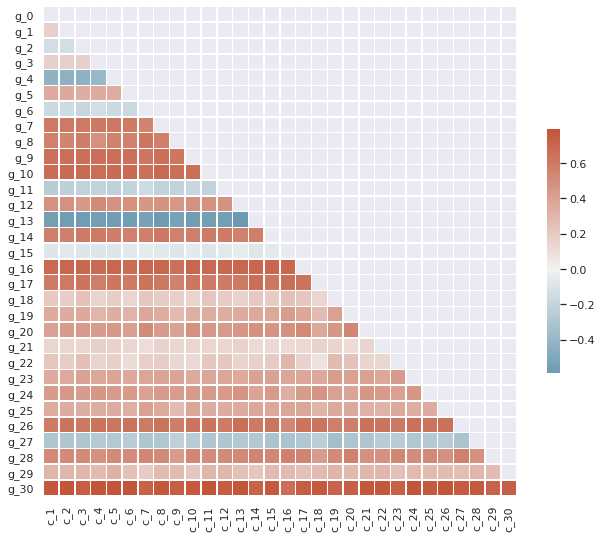

In [33]:
pltgraph(corr_cel_genes72)

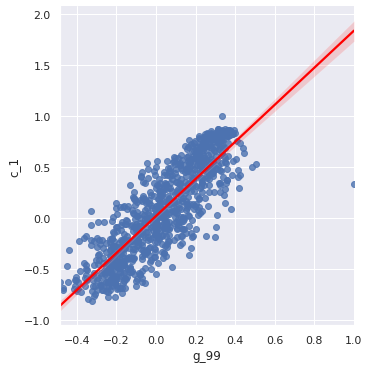

In [38]:
sns.lmplot(data=filtered_corr_t24, x='g_99', y='c_1', line_kws={'color':'red'})

Foi realizado uma análise de forma mais ampliada sendo utilizado a dose 1 (D1) para as 3 experimentações temporais (24/48/72 horas).
> É possível observar que aparentemente as expressões gênicas correlaciona-se a viabilidade celular, sendo a parte mais translucida a correlação é relativamente baixa ou nula.

* Na amostragem pode-se perceber baixa correlação em determinados pontos, seria necessário avaliar os compostos utilizados para a observação.




In [34]:
# Desafio 06

'''
> np.triu = Retorna uma cópia de uma matriz com os elementos abaixo da k-ésima diagonal zerados. 
> np.one_like = Retorne uma matriz de uns com a mesma forma e tipo de uma determinada matriz. 
> sns.diverging_palette = Faça uma paleta divergente entre duas cores HUSL.
> sns.heatmap = Plote dados retangulares como uma matriz codificada por cores.
'''

'\n> np.triu = Retorna uma cópia de uma matriz com os elementos abaixo da k-ésima diagonal zerados. \n> np.one_like = Retorne uma matriz de uns com a mesma forma e tipo de uma determinada matriz. \n> sns.diverging_palette = Faça uma paleta divergente entre duas cores HUSL.\n> sns.heatmap = Plote dados retangulares como uma matriz codificada por cores.\n'

### Desafio 07

- Utilização do método .crosstab do pandas afim de criar uma tabela de frequência.
-- A execução do metódo lembrou o uso do .value_counts, no entanto, o .crosstab traz os dados de forma segmentada.
- Usando o a função 'normalize' recebendo o parâmetro 'index' é possível verificar a homogeneidade da relacionado as variaveis pesquisadas, sendo a soma igual a 1.
- As medidas apresentadas são relevantes, se de fato possui significância estatística.
- Criação de scatterplot utilizando sns.
-- O sccaterplot em resumo faz um plano cartesiano.
-- Com a função .implot é possível observar melhor a tendência.

Correlações das expressões gênicas.
- (**-1 e +1**): Quando se tem correlações muito próxima de **-1 e +1** significa que há variáveis altamente correlacionadas.
> Quer dizer que as variáveis são proporcionalmente correlacionados, ou seja,  quando um sobe o outro sobe também.

- (**0**): Quando se tem correlações muito próxima de **0** significa que as variáveis não são correlacionadas.
> Quer dizer que as variáveis são inversamente correlacionados, ou seja,  quando um sobe o outro desce.
-- Neste caso significa que uma variável não afeta a outro.

- P-Hacking: É um termo amplo usado em pesquisa científica para descrever vários tipos de manipulação comumente empregados na análise de dados que levam a resultados estatisticamente significativos mas equivocados ou enganosos.
